In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
# Use the Pathlib libary to set the path to the CSV
algo = Path("Homework_Week 3 and 4_Starter_Code_Resources_algo_returns.csv")
otex = Path("Homework_Week 3 and 4_Starter_Code_Resources_otex_historical.csv")
sptsx= Path("Homework_Week 3 and 4_Starter_Code_Resources_sp_tsx_history.csv")
whale_return = Path("Homework_Week 3 and 4_Starter_Code_Resources_whale_returns.csv")
shop = Path("Homework_Week 3 and 4_Starter_Code_Resources_shop_historical.csv")

In [3]:
# Read in the CSV as a DataFrame
algo_df = pd.read_csv(algo, infer_datetime_format=True, parse_dates=True, index_col = "Date")
otex_df = pd.read_csv(otex, infer_datetime_format=True, parse_dates=True, index_col = "Date")
sptsx_df = pd.read_csv(sptsx, infer_datetime_format=True, parse_dates=True, index_col = "Date")
whale_return_df = pd.read_csv(whale_return, infer_datetime_format=True, parse_dates=True, index_col = "Date")
shop_df = pd.read_csv(shop, infer_datetime_format=True, parse_dates=True, index_col = "Date")


In [4]:
sptsx_df.columns = ['S&P TSX']

#Concatenate dues data using rows axis and inner join
combined_df= pd.concat(
    [whale_return_df,algo_df,sptsx_df], axis="columns", join="inner"
)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,"$15,264.05"
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,"$15,133.85"
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,"$15,082.84"
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,"$15,103.11"
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,"$14,952.50"


In [5]:
# Check for nulls
combined_df.isnull().mean() * 100

# Drop nulls
df = combined_df.dropna(axis = 0)

# Drop duplicates
df = combined_df.drop_duplicates()

# Validate no more missing values
df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

In [6]:
combined_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P TSX                         object
dtype: object

In [7]:
#If any columns have dollar signs or characters other than numeric values, remove those characters and convert the data types as needed.
df['S&P TSX'] = df.loc[:,'S&P TSX'].str.replace('$',"")
df['S&P TSX'] = df.loc[:,'S&P TSX'].str.replace(',',"")
df["S&P TSX"] = df["S&P TSX"].astype("float")
df['S&P TSX']

Date
2015-03-02    15264.05
2015-03-03    15133.85
2015-03-04    15082.84
2015-03-05    15103.11
2015-03-06    14952.50
                ...   
2019-04-25    16576.10
2019-04-26    16613.46
2019-04-29    16600.37
2019-04-30    16580.73
2019-05-01    16502.75
Name: S&P TSX, Length: 1030, dtype: float64

In [8]:
#Convert the S&P TSX 60 closing prices to daily returns.
sptsx_df['S&P TSX'] = sptsx_df.loc[:,'S&P TSX'].str.replace('$',"")
sptsx_df['S&P TSX'] = sptsx_df.loc[:,'S&P TSX'].str.replace(',',"")
sptsx_df["S&P TSX"] = sptsx_df["S&P TSX"].astype("float")
sptsx_df.head()

,S&P TSX
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [9]:
sptsx_df_dailyreturn =sptsx_df.pct_change()
sptsx_df_dailyreturn 

,S&P TSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [10]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df_return= pd.concat(
    [whale_return_df,algo_df,sptsx_df_dailyreturn], axis="columns", join="inner"
)
combined_df_return

combined_df_return.dropna(axis = 0, inplace=True)
combined_df_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


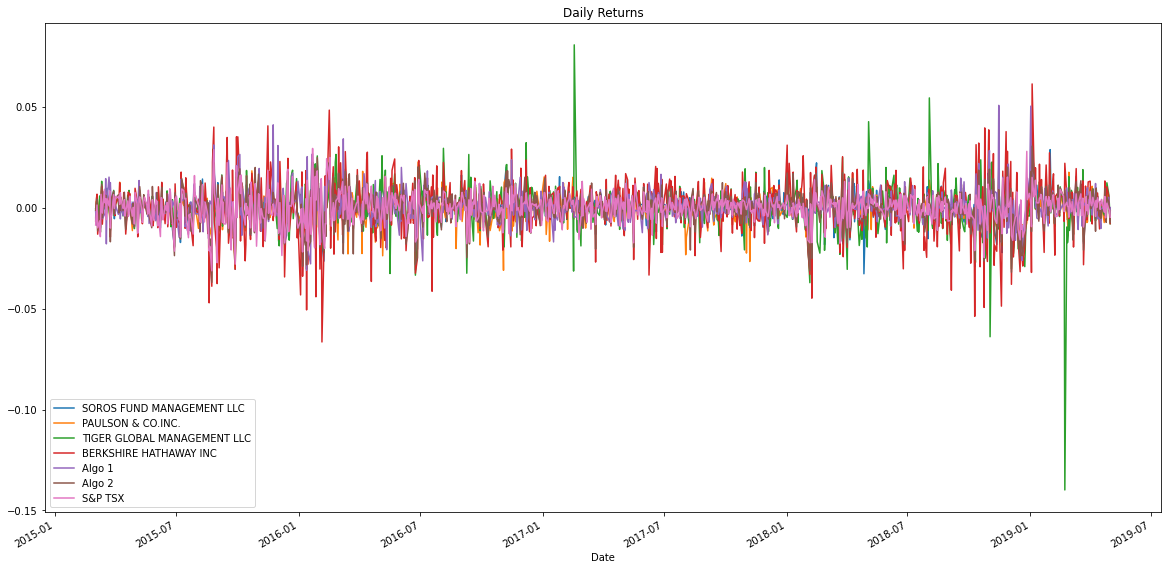

In [11]:
# Plot daily returns of all portfolios
combined_df_return.plot(kind='line',figsize=(20, 10), title='Daily Returns') 

In [12]:
#Does any portfolio outperform the S&P TSX 60?
print ("The majority of the portfolio is inlign with the S&P, Tiger Global Management LLC  shows outliners during the period, outperforming the S&P 3 times during the period over 0.5. Berkshire Hathaway appears to show some volatility during 2005 -2006.")

The majority of the portfolio is inlign with the S&P, Tiger Global Management LLC  shows outliners during the period, outperforming the S&P 3 times during the period over 0.5. Berkshire Hathaway appears to show some volatility during 2005 -2006.


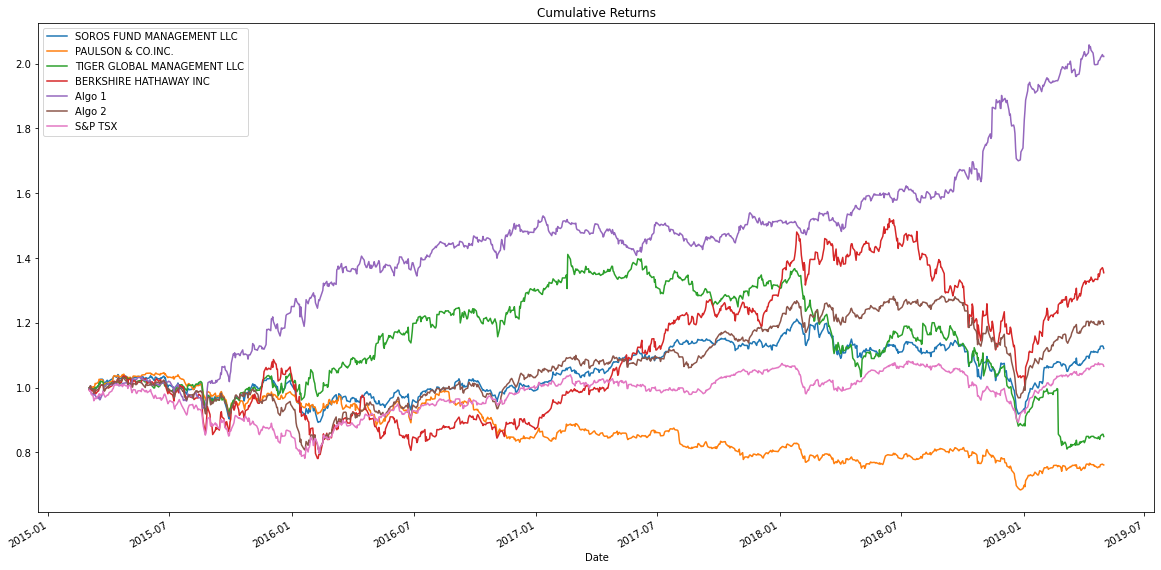

In [13]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df_return).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title='Cumulative Returns') 

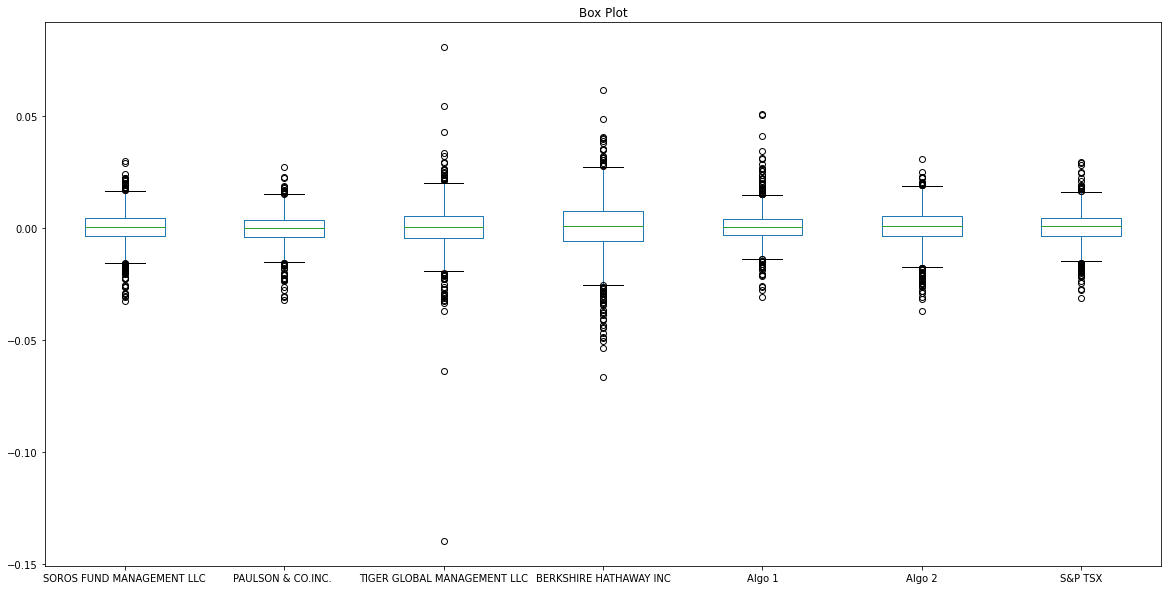

In [15]:
# Box plot to visually show risk
combined_df_return.plot.box(figsize=(20, 10), title='Box Plot') 

In [44]:
# Calculate the daily standard deviations of all portfolios
combined_return_std = combined_df_return.std()
combined_return_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

In [46]:
combined_return_std = combined_return_std.sort_values(ascending=False)
combined_return_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [50]:
# Determine which portfolios are riskier than the S&P TSX 60
print ("Berkshire Hathaway Inc has the largest spread followed by Tiger Global Management LLC,They also have the highest standard deviation in the list, making it riskier than the S&P.")

Berkshire Hathaway Inc has the largest spread followed by Tiger Global Management LLC,They also have the highest standard deviation in the list, making it riskier than the S&P.


In [53]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_return_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

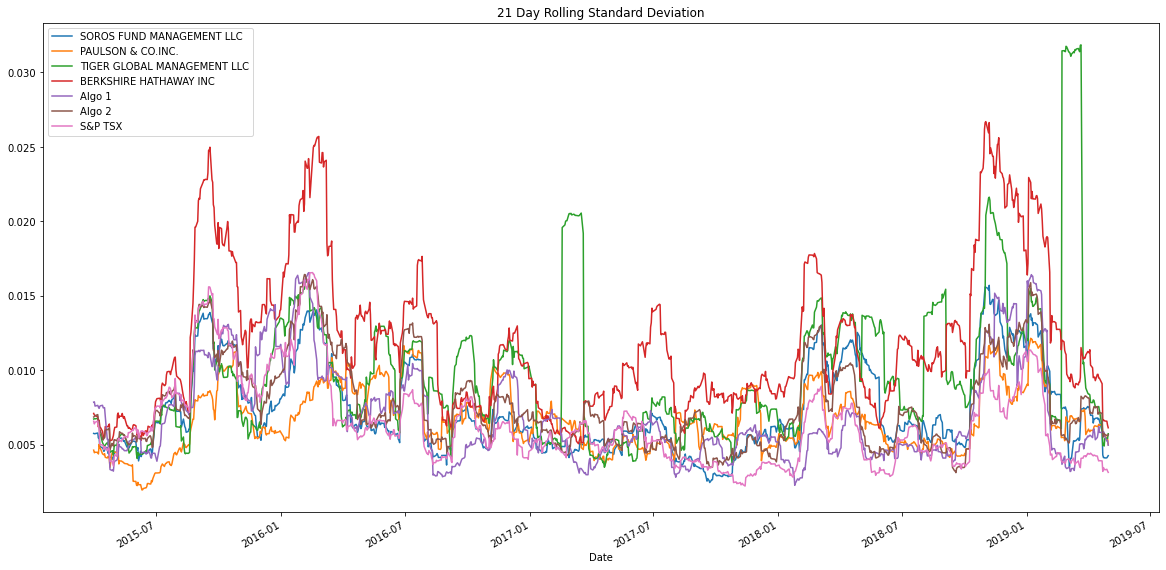

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined_return_std = combined_df_return.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_combined_return_std.plot(figsize=(20,10), title= "21 Day Rolling Standard Deviation")

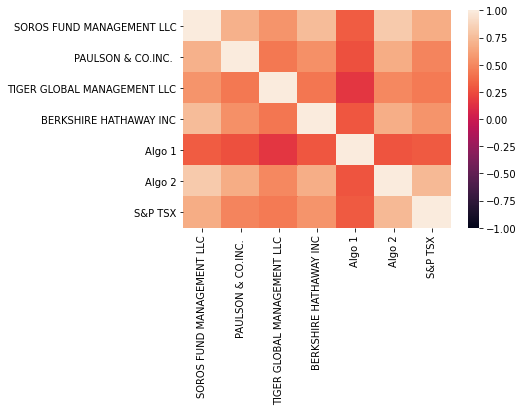

In [21]:
# Calculate the correlation
correlation=combined_df_return.corr()
correlation.head()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1) 

In [22]:
whale_return_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


BERKSHIRE HATHAWAY INC covariance: 0.00016462859429907493
S&P TSX variance: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64


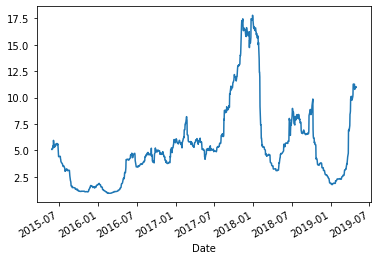

In [23]:
# Calculate covariance of a single portfolio
rolling_covariance = whale_return_df["BERKSHIRE HATHAWAY INC"].cov(whale_return_df["BERKSHIRE HATHAWAY INC"])
print(f"BERKSHIRE HATHAWAY INC covariance: {rolling_covariance}")

# Calculate variance of S&P TSX
rolling_variance = combined_df_return ["S&P TSX"].rolling(window=60).var()
print(f"S&P TSX variance: {rolling_variance}")

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot()

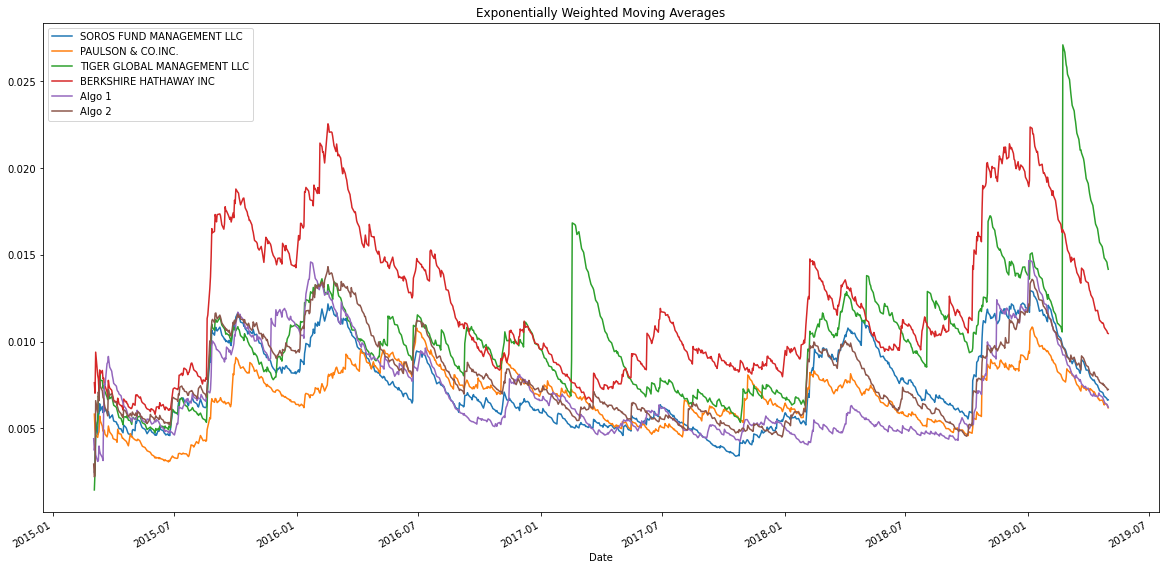

In [24]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Moving Averages")

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df_return.mean()*252/(combined_df_return.std()*np.sqrt(252))

# Sort Sharpe Ratios
sharpe_ratios_sorted = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

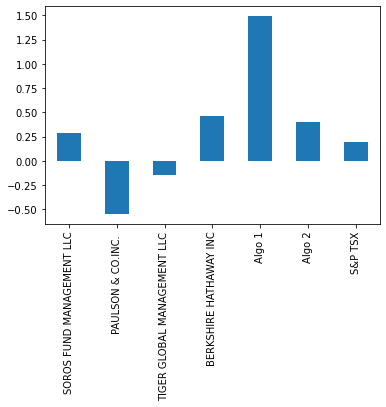

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

In [54]:
# Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
print ("Algo 1 outperformed the S&P and the whales portfolios")

Algo 1 outperformed the S&P and the whales portfolios


In [27]:
# Reading data from stock
LYC = Path("LYC3.csv")
PNI = Path("PNI3.csv")
RFF = Path("RFF3.csv")
RMD = Path("RMD3.csv")

LYC_df = pd.read_csv(LYC, infer_datetime_format=True, parse_dates=True, index_col = "Date")
PNI_df = pd.read_csv(PNI, infer_datetime_format=True, parse_dates=True, index_col = "Date")
RFF_df = pd.read_csv(RFF, infer_datetime_format=True, parse_dates=True, index_col = "Date")
RMD_df = pd.read_csv(RMD, infer_datetime_format=True, parse_dates=True, index_col = "Date")

In [28]:
sptsx_df.columns = ['S&P TSX']

# Combine all stocks in a single DataFrame
my_port_df= pd.concat(
    [LYC_df,PNI_df,RFF_df,RMD_df], axis="columns", join="inner"
)
my_port_df


,Close,Close,Close,Close
Date,,,,
2015-03-02 16:00:00,0.55,1.11,1.03,8.24
2015-03-03 16:00:00,0.52,1.10,1.00,8.27
2015-03-04 16:00:00,0.53,1.08,1.03,8.21
2015-03-05 16:00:00,0.53,1.07,1.00,8.31
2015-03-11 16:00:00,0.49,1.08,0.99,8.78
...,...,...,...,...
2019-04-24 16:00:00,1.99,5.83,2.26,14.39
2019-04-26 16:00:00,1.99,5.90,2.27,14.57
2019-04-29 16:00:00,1.98,6.13,2.28,14.72


In [29]:
# Reorganize portfolio data by having a column per symbol
my_port_df.columns = ["LYC", "PNI", "RFF", "RMD"]
my_port_df.head()

,LYC,PNI,RFF,RMD
Date,,,,
2015-03-02 16:00:00,0.55,1.11,1.03,8.24
2015-03-03 16:00:00,0.52,1.10,1.00,8.27
2015-03-04 16:00:00,0.53,1.08,1.03,8.21
2015-03-05 16:00:00,0.53,1.07,1.00,8.31
2015-03-11 16:00:00,0.49,1.08,0.99,8.78


In [30]:
# Check for nulls
my_port_df.isnull().mean() * 100

# Drop nulls
df = my_port_df.dropna(axis = 0)

# Drop duplicates
df = my_port_df.drop_duplicates()

# Validate no more missing values
my_port_df.isnull().sum()

LYC    0
PNI    0
RFF    0
RMD    0
dtype: int64

In [31]:
my_port_df.dtypes

LYC    float64
PNI    float64
RFF    float64
RMD    float64
dtype: object

In [32]:
# Calculate portfolio return
my_port_return_df = my_port_df.pct_change()
my_port_return_df.head()

# Drop NAs
# Display sample data
my_port_return_df.dropna(axis = 0, inplace=True)
my_port_return_df

# Reset Date index
my_port_return_df.index = my_port_return_df.index.normalize()

my_port_return_df.sort_index(inplace=True)
my_port_return_df.head()

,LYC,PNI,RFF,RMD
Date,,,,
2015-03-03,-0.054545,-0.009009,-0.029126,0.003641
2015-03-04,0.019231,-0.018182,0.030000,-0.007255
2015-03-05,0.000000,-0.009259,-0.029126,0.012180
2015-03-11,-0.075472,0.009346,-0.010000,0.056558
2015-03-12,0.020408,0.000000,0.000000,0.020501


In [33]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]
# Use the `dot` function to sum the product each weight and the corresponding stock daily return.
my_port_return_df = my_port_return_df.dot(weights)
# Diplay sample values
my_port_return_df.head()

Date
2015-03-03   -0.022260
2015-03-04    0.005948
2015-03-05   -0.006551
2015-03-11   -0.004892
2015-03-12    0.010227
dtype: float64

In [34]:
# Join your returns DataFrame to the original returns DataFrame
 
combined_my_port= pd.concat(
    [combined_df_return, my_port_return_df], axis="columns", join="inner"
)

combined_my_port

combined_my_port.rename(columns = {0:"LYC/PNI/RFF/RMD"}, inplace = True)
combined_my_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,LYC/PNI/RFF/RMD
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.022260
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.005948
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.006551
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,-0.004892
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139,0.010227
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.002410
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.007235
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.012165


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_my_port.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,LYC/PNI/RFF/RMD
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.022260
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.005948
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.006551
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,-0.004892
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139,0.010227
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.002410
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.007235
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.012165


In [36]:
# Calculate the annualized `std`
port_std =combined_my_port.std()

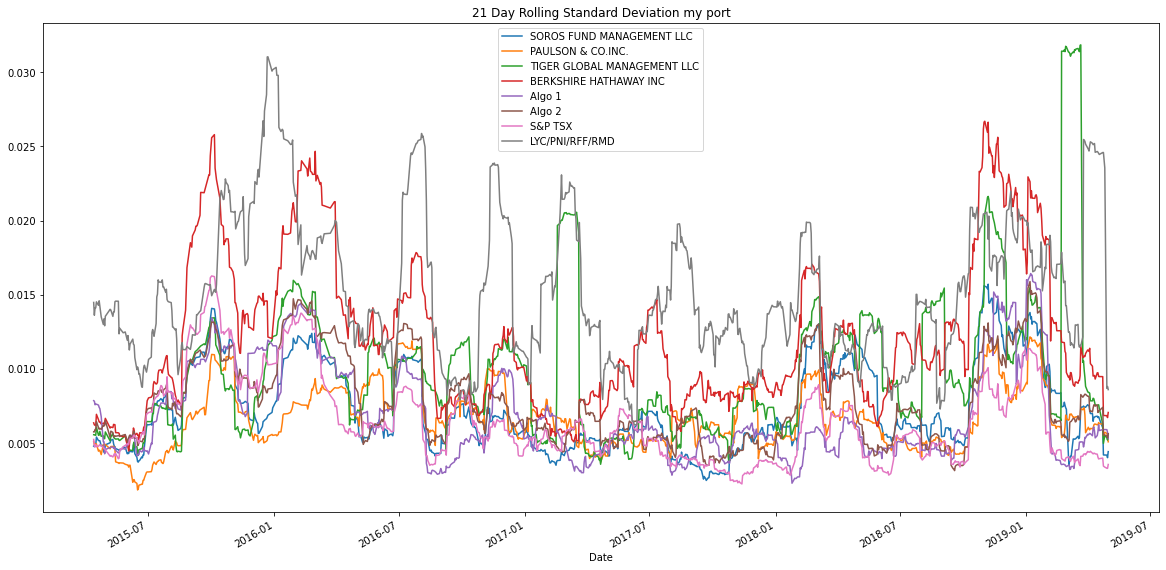

In [37]:
# Calculate rolling standard deviation
rolling_port_std = combined_my_port.rolling(window=21).std()

# Plot rolling standard deviation
rolling_port_std.plot(figsize=(20,10), title= "21 Day Rolling Standard Deviation my port")

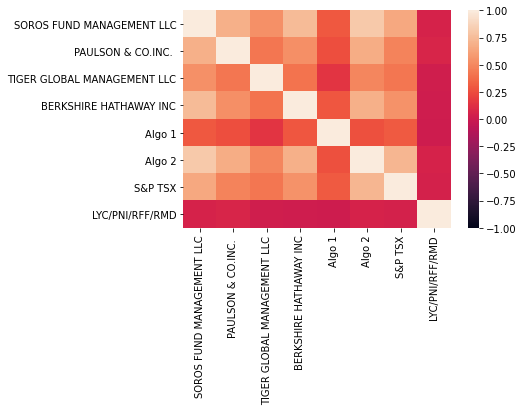

In [38]:
# Calculate and plot the correlation
correlation=combined_my_port.corr()
correlation.head()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1) 

LYC/PNI/RFF/RMD covariance: 0.0002434872098804
S&P TSX variance: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64


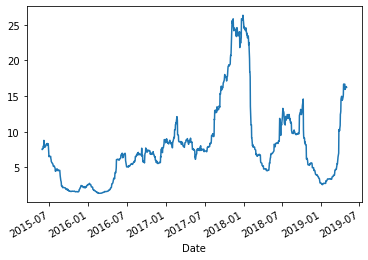

In [39]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_my_port["LYC/PNI/RFF/RMD"].cov(combined_my_port["LYC/PNI/RFF/RMD"])
print(f"LYC/PNI/RFF/RMD covariance: {rolling_covariance}")

# Calculate variance of S&P TSX
rolling_variance = combined_df_return ["S&P TSX"].rolling(window=60).var()
print(f"S&P TSX variance: {rolling_variance}")

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot()

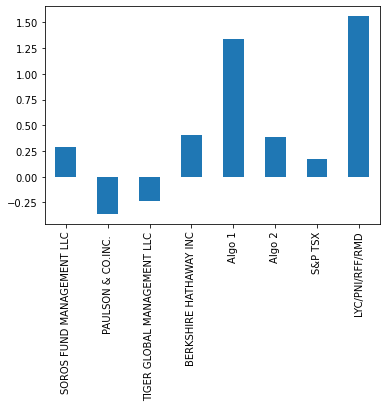

In [40]:
# Calculate Annualzied Sharpe Ratios
my_port_sharpe_ratios = combined_my_port.mean()*252/(combined_my_port.std()*np.sqrt(252))

# Sort Sharpe Ratios
my_port_sharpe_ratios_sorted = my_port_sharpe_ratios.sort_values(ascending=False)
my_port_sharpe_ratios

# Visualize the sharpe ratios as a bar plot
my_port_sharpe_ratios.plot(kind="bar")

In [57]:
# How does your portfolio do?
print ("LYC,PNI,RFF and RMD all outperformed both market the S&P and the whales portfolio.")

LYC,PNI,RFF and RMD all outperformed both market the S&P and the whales portfolio.
